In [5]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
import xgboost as xgb
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
import shap

df = pd.read_table('reg_2fold.txt')
#选择需要的feature
target = df['level']
onehot = pd.get_dummies(df.iloc[:,:10])
data = df['MFE']
feature = pd.concat([onehot,data],axis = 1)

x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.2,random_state=2022)
dtrain = xgb.DMatrix(x_train,y_train)
dtest=xgb.DMatrix(x_test,y_test)
dtrain = xgb.DMatrix(x_train,y_train)
dtest=xgb.DMatrix(x_test,y_test)

params = {
    'nthread': 12,
    'learning_rate' : 0.1
}
params['eval_metric'] = ["rmse"]
num_rounds = 61
evallist = [(dtest, 'eval'), (dtrain, 'train')]


model = xgb.train(params,dtrain,num_rounds,evals=evallist,early_stopping_rounds=10)

[0]	eval-rmse:0.41518	train-rmse:0.41461
[1]	eval-rmse:0.37673	train-rmse:0.37618
[2]	eval-rmse:0.34242	train-rmse:0.34189
[3]	eval-rmse:0.31187	train-rmse:0.31135
[4]	eval-rmse:0.28472	train-rmse:0.28421
[5]	eval-rmse:0.26065	train-rmse:0.26014
[6]	eval-rmse:0.23940	train-rmse:0.23888
[7]	eval-rmse:0.22067	train-rmse:0.22013
[8]	eval-rmse:0.20424	train-rmse:0.20368
[9]	eval-rmse:0.18989	train-rmse:0.18930
[10]	eval-rmse:0.17741	train-rmse:0.17679
[11]	eval-rmse:0.16659	train-rmse:0.16595
[12]	eval-rmse:0.15729	train-rmse:0.15662
[13]	eval-rmse:0.14932	train-rmse:0.14862
[14]	eval-rmse:0.14253	train-rmse:0.14180
[15]	eval-rmse:0.13679	train-rmse:0.13603
[16]	eval-rmse:0.13197	train-rmse:0.13114
[17]	eval-rmse:0.12791	train-rmse:0.12705
[18]	eval-rmse:0.12453	train-rmse:0.12363
[19]	eval-rmse:0.12173	train-rmse:0.12077
[20]	eval-rmse:0.11940	train-rmse:0.11841
[21]	eval-rmse:0.11749	train-rmse:0.11645
[22]	eval-rmse:0.11591	train-rmse:0.11483
[23]	eval-rmse:0.11461	train-rmse:0.11349
[2

In [6]:
test_pred = model.predict(dtest)
train_pred=model.predict(dtrain)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("RMSE of train：", np.sqrt(mean_squared_error(y_true=y_train,y_pred=train_pred)))
print("RMSE of test：", np.sqrt(mean_squared_error(y_true=y_test,y_pred=test_pred)))
print("MAE of train：", np.sum(np.absolute(train_pred-y_train))/len(y_train))
print("MAE of TEST：", np.sum(np.absolute(test_pred-y_test))/len(y_test))
print("r_squared of TEST：",r2_score(y_test,test_pred))
print("r_squared of train：",r2_score(y_train,train_pred))

RMSE of train： 0.10686507204629704
RMSE of test： 0.1090025001701256
MAE of train： 0.05335130729256742
MAE of TEST： 0.05401020233374332
r_squared of TEST： 0.33645888169962035
r_squared of train： 0.3614370037052229


In [7]:
from scipy.stats import spearmanr,pearsonr
spearman_train=spearmanr(y_train,train_pred)
spearman_test=spearmanr(y_test,test_pred)
pearson_train=pearsonr(y_train,train_pred)
pearson_test=pearsonr(y_test,test_pred)
print("Spearman correlation:")
print("Train:"+str(spearman_train))
print("Test:"+str(spearman_test))
print("\n")
print("Pearson correlation:")
print("Train:"+str(pearson_train))
print("Test:"+str(pearson_test))

Spearman correlation:
Train:SpearmanrResult(correlation=0.7564852085893254, pvalue=0.0)
Test:SpearmanrResult(correlation=0.751875585191135, pvalue=0.0)


Pearson correlation:
Train:(0.6014282813273791, 0.0)
Test:(0.5800737007731637, 0.0)


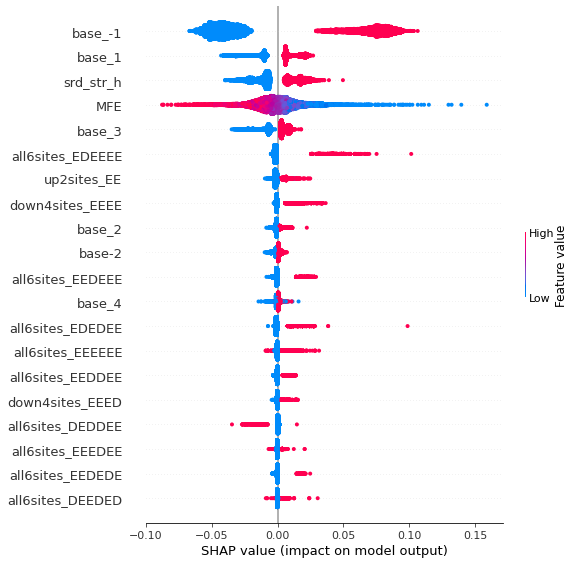

In [8]:
# summarize the effect of all the features 
# summarize the effect of all the features 
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values,x_test,show=False)
#plt.savefig("fold2.shap.jpg", format='jpg',dpi=600,bbox_inches="tight")
plt.savefig("fold2.shap.pdf", format='pdf',dpi=600,bbox_inches="tight")

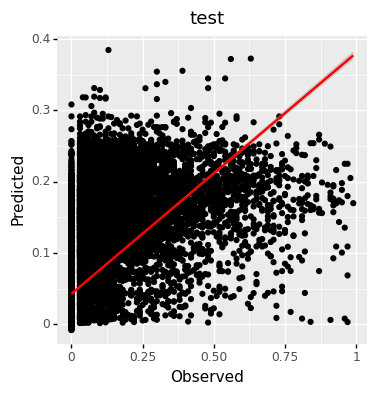

/users/xulab/miniconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 4 x 4 in image.
/users/xulab/miniconda3/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: flod2_smooth.pdf


In [5]:
import plotnine
from plotnine import *
test_df=pd.DataFrame({'Observed':y_test,
                     'Predicted':test_pred,
                     'Dataset':'test'})
train_df=pd.DataFrame({'Observed':y_train,
                     'Predicted':train_pred,
                     'Dataset':'train'})

plotnine.options.figure_size = (4, 4)
p=(ggplot(test_df,aes('Observed','Predicted'))+geom_point()+ stat_smooth(method='lm',color='red')+ggtitle("test"))
print(p)
ggsave(plot=p, filename='flod2_smooth.pdf',width=4,height=4,units='in')

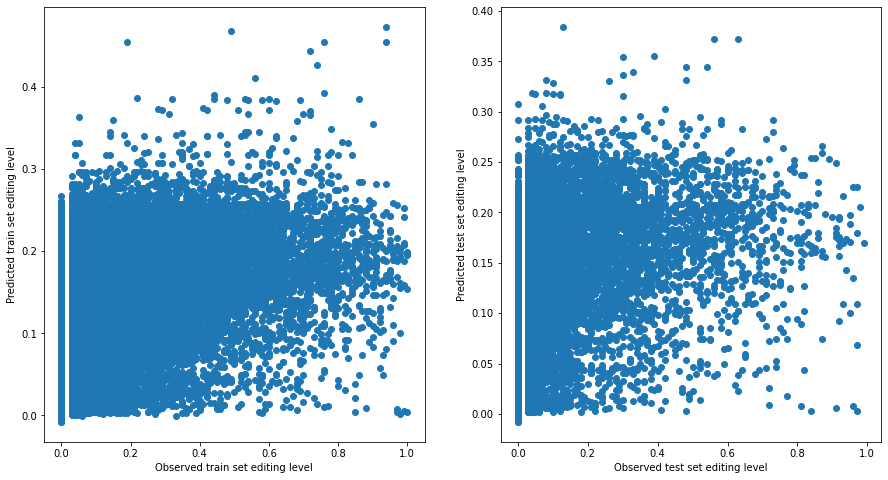

In [14]:
 #plot the test set predictions 
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [15, 8]
plt.subplot(1,2,1)
plt.plot(list(y_train),list(train_pred),'o')
plt.xlabel("Observed train set editing level")
plt.ylabel("Predicted train set editing level")
plt.subplot(1,2,2)
plt.plot(list(y_test),list(test_pred),'o')
plt.xlabel("Observed test set editing level")
plt.ylabel("Predicted test set editing level")
plt.savefig("fold2.predict.jpg", format='jpg',dpi=600,bbox_inches="tight")

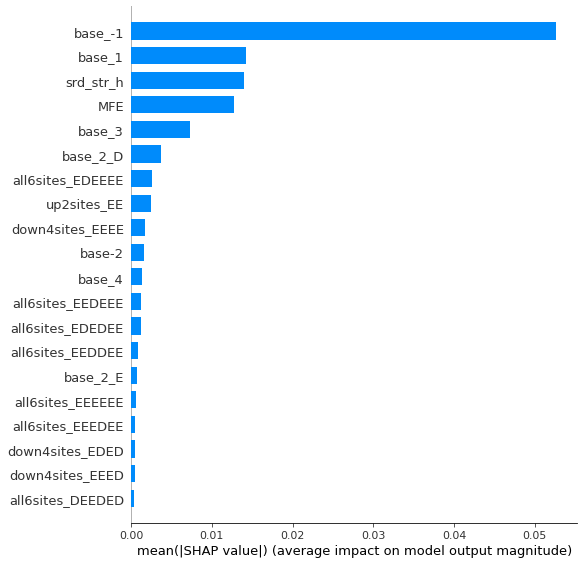

In [6]:
shap.summary_plot(shap_values, x_test, plot_type="bar",max_display=20,show=False)
plt.savefig("fold2.bar.pdf", format='pdf',bbox_inches="tight")

In [7]:
mean_abs_shap_vals=np.mean(abs(shap_values),axis=0)
features=x_test.columns
shap_dict=pd.DataFrame({'feature':features,
          'mean_abs_shap':mean_abs_shap_vals})
shap_dict.to_csv("regre_2fold_shap_mean_abs.txt",index=False,sep='\t')